# Statistical Learning - Luca Pennella Project

 # 1.1  Data description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  The prediction task is to determine whether a person makes over $50K a year.

**Categorical Attributes**
* **workclass**:  Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
 * **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
 * **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
 * **occupation**:  Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
 * **relationship**:  Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 * **race**:  White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
 * **sex**:  Female, Male.
 * **native-country**:  United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**Continuos Attributes**
 * **age**: Age of an individual.
 * **fnlwgt**: The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.
 * **capital-gain**: continuous.
 * **capital-loss**: continuous.
 * **hours-per-week**: Individual's working hour per week.

# Import Modules

In [1]:
import pandas as pd #to load and manipulate data
import numpy as np
import matplotlib.pyplot as plt #to draw graphs 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier #to build a classificarion Tree
from sklearn.tree import plot_tree #to draw a classification Tree
from sklearn.model_selection import train_test_split #to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross-validation
from sklearn.metrics import confusion_matrix #to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix  #to draw a confusion matrix
from sklearn.metrics import accuracy_score,classification_report #to plot score information
from imblearn.over_sampling import SMOTE 

# Import the data

In [2]:
df = pd.read_csv(r'C:\Users\lpennella\Desktop\Master\Statistical Learning - Prof. Gottard/adult.csv')

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [5]:
df.shape

(48842, 15)

# Clean the data

In [6]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
len(df.loc[df['workclass'] == '?'])

2799

In [8]:
len(df)

48842

In [9]:
df_no_missing = df.loc[(df['workclass'] != '?')
                       &
                       (df['education'] != '?')
                        &
                       (df['marital-status'] != '?')
                       &
                       (df['occupation'] != '?')
                       &
                       (df['relationship'] != '?')
                       &
                       (df['race'] != '?')
                       &
                       (df['gender'] != '?')
                       &
                       (df['native-country'] != '?')                 
                    ]

In [10]:
df_no_missing.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [11]:
len(df_no_missing)

45222

In [12]:
X = df_no_missing.drop('income', axis = 1).copy() #The Pandas drop() function in Python is used to drop specified labels from rows and columns
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [13]:
y = df_no_missing['income'].copy()
y.head()


0    <=50K
1    <=50K
2     >50K
3     >50K
5    <=50K
Name: income, dtype: object

In [14]:
df_no_missing['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [15]:
X.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
dtype: object

# Exploratory Data Analysis

In [16]:
cat_cols = df_no_missing.select_dtypes('object')
num_cols = df_no_missing.select_dtypes(['int64'])

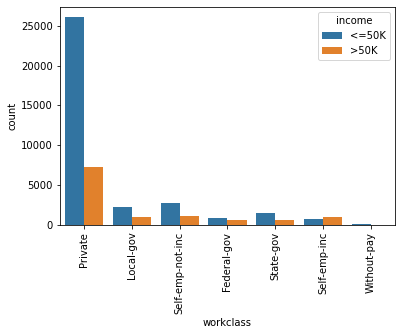

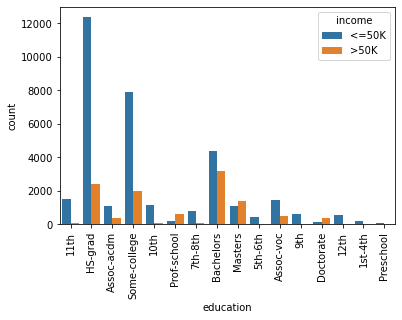

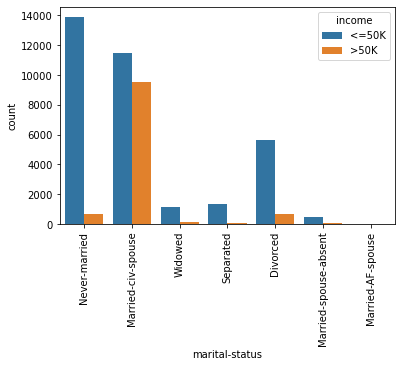

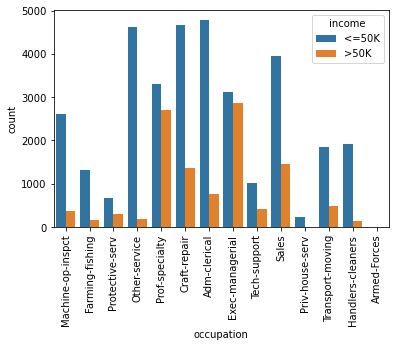

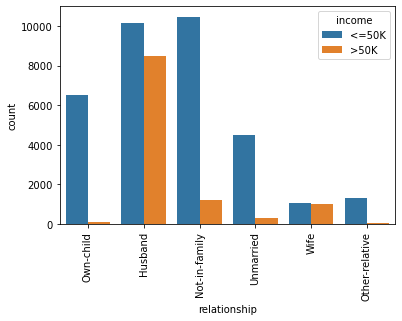

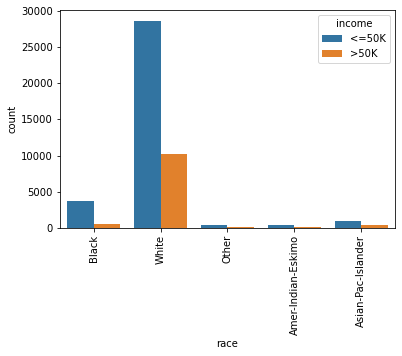

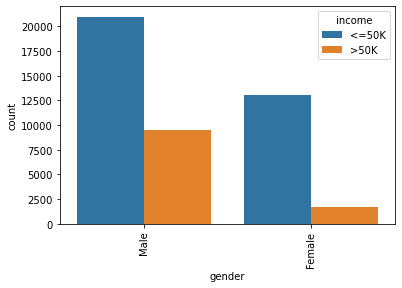

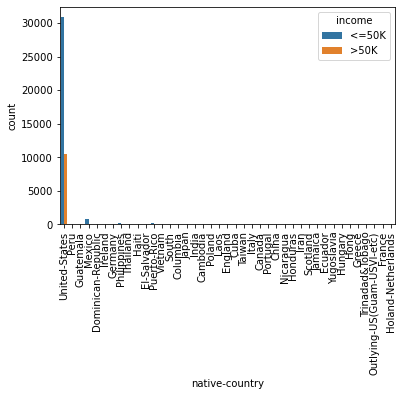

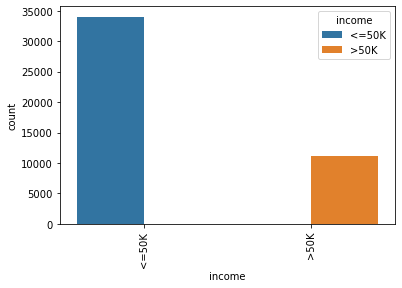

In [17]:
for col in cat_cols:
    sns.countplot(x=df_no_missing[col], hue=df_no_missing["income"])
    plt.xticks(rotation=90)
    plt.show()

**Workclass**
* In private workclass most of the people earn <=50k.
* self-emp-inc workclass is only where more people earn >50k.
* In Federal-gov workclass nearly more than half of the people earn >50k.

**Marital-status**
* Married-civ-spouse has the highest percentage(20.44%) of falling under the income group >50k.
* Despite the fact that we have major observation in the marital-status attribute but only 1.5% of the people of "Never-married" earn more than 50k.

**Occupation**
* In every occupation, people who earn less than 50k is greater than people who earn >50k.
* Prof-specialty and Exec-managerial have maximum percentage that fall in income group 1.

**Relationship**
* husbands has the highest percentage of earning more than 50k in all the other categories.
* One thing to notice is that "not-in-family" has highest percentage to earn less than 50k.

**Gender**
* For "female" earning more than 50k is rare with only 3.62% of all observations.

**Native country**
* Over 90% of the population is native to America.

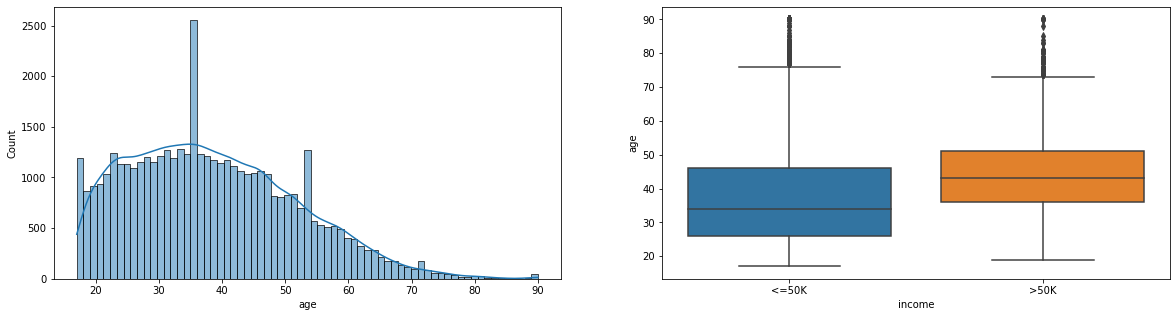

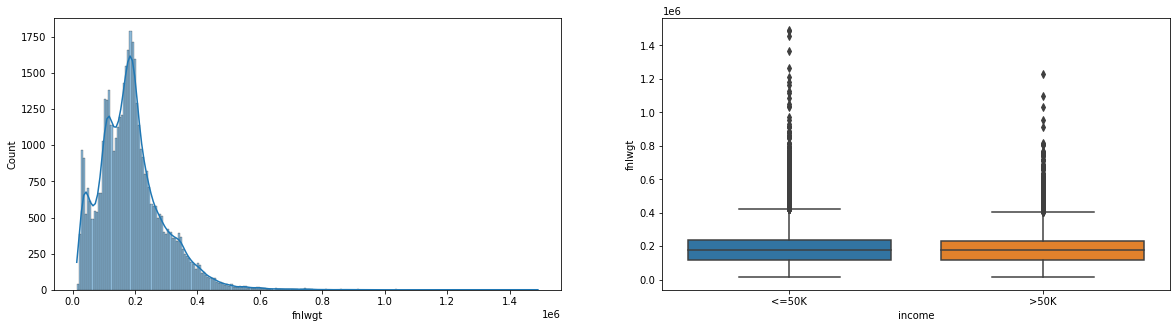

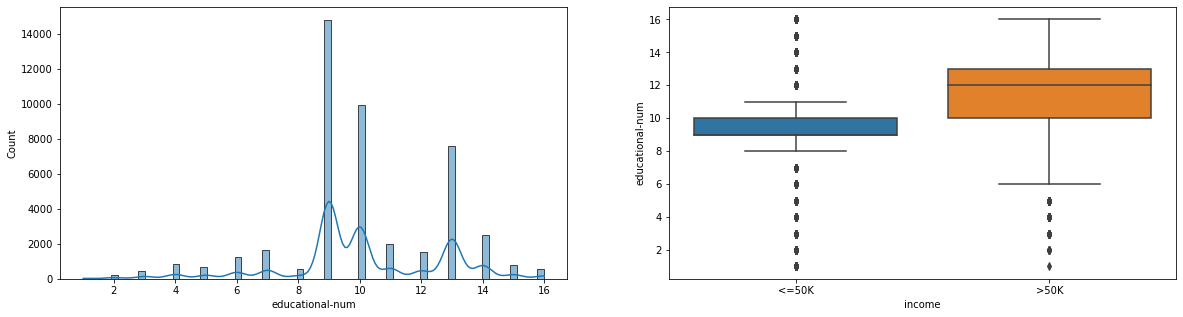

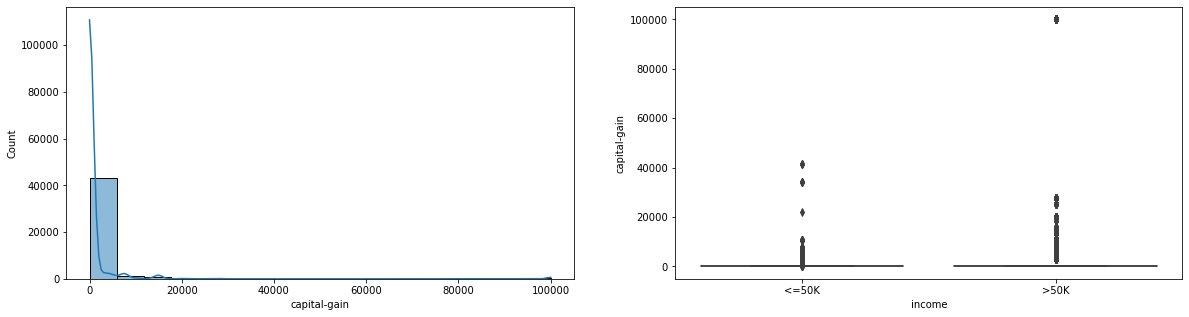

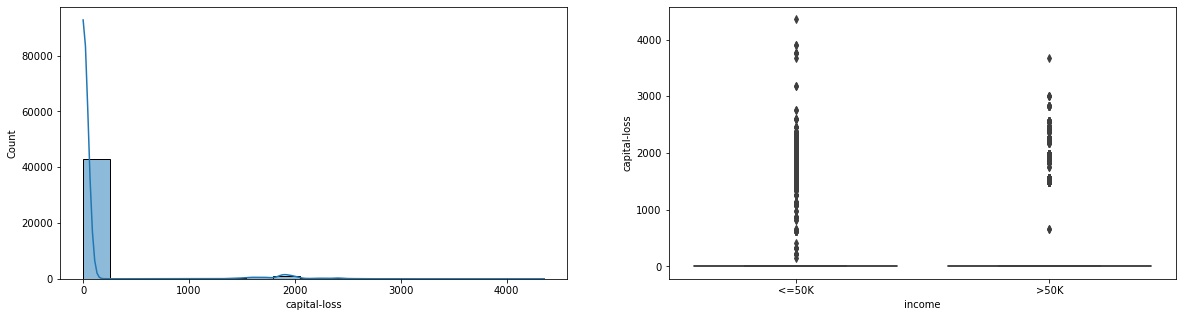

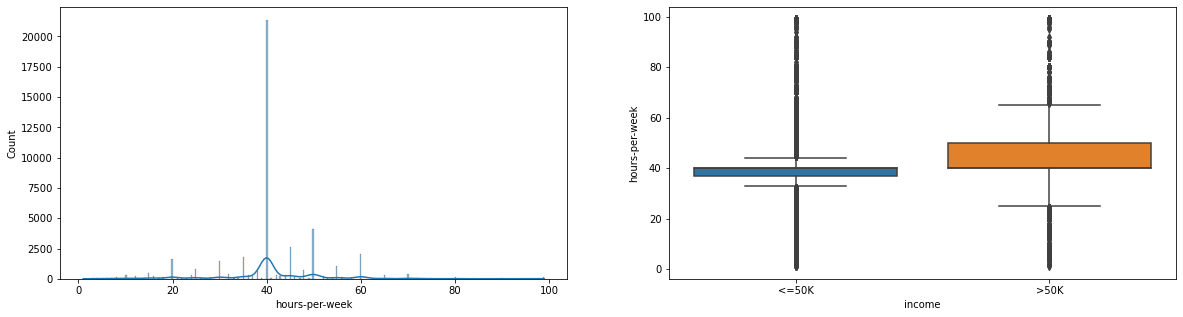

In [18]:
for col in num_cols:
    f, axis = plt.subplots(1,2, figsize=(20, 5))
    sns.histplot(x=df_no_missing[col], ax=axis[0], kde=True)
    #sns.distplot(x=df_no_missing[col], ax=axis[0], kde=True)
    sns.boxplot(x=df_no_missing['income'], y=df_no_missing[col], ax=axis[1])
    plt.show()

**Age**
* "age" attribute is not symmetric.
*  Minimum and Maximum age of the people is 17 and 90 respectively.
*  Looking at the boxplots, it is possible to see that in proportion as age increases, earnings increase.

**Fnalweight**
* The distribution of finalweight seems to be rightly skewed since mean(189664.1) is greater than median(178144.5).

**Education**
* A higher level of education provides higher income on average

**Hours per week**
* Most people work 30-40 hours per week, they are roughly 27,000 people.
* There are also few people who works 80-100 hours per week and some less than 20 which is unusual. 

# Encoding Categorical Features

In [19]:
X_encoded = pd.get_dummies(X, columns= ['workclass',
                                        'marital-status',
                                        'occupation',
                                        'relationship',
                                        'race',
                                        'gender',
                                        'native-country'])
X_encoded.head()

,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,11th,7,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,HS-grad,9,0,0,50,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,Assoc-acdm,12,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,Some-college,10,7688,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,10th,6,0,0,30,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [20]:
X_encoded = X_encoded.drop('education', axis = 1).copy()
X_encoded.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
y = pd.get_dummies(y[:])

In [22]:
y

,<=50K,>50K
0,1,0
1,1,0
2,0,1
3,0,1
5,1,0
...,...,...
48837,1,0
48838,0,1
48839,1,0
48840,1,0


In [23]:
y_final = y.drop('<=50K', axis = 1).copy()
y_final.head()

,>50K
0,0
1,0
2,1
3,1
5,0


In [24]:
len(y_final)

45222

In [47]:
len(y.loc[y['>50K'] == 1])

11208

In [25]:
len(X_encoded)

45222

# SMOTE for Imbalanced Classification
A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [26]:
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_encoded,y_final)
print(y_balanced.value_counts())

>50K
0       34014
1       34014
dtype: int64


# Build a Preliminary Classification Tree

In [27]:
# split the data into training e testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, random_state = 42)

#create a decision Tree and fit it to training data (not optmize) 
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train) 

C:\Users\lpennella\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


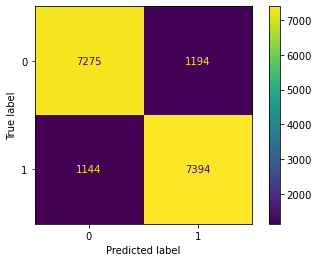

In [28]:
plot_confusion_matrix(clf_dt, X_test, y_test)

In [29]:
print(f'train accuracy: {accuracy_score(y_train,clf_dt.predict(X_train))}')
print(f'test accuracy:  {accuracy_score(y_test,clf_dt.predict(X_test))}')
print(classification_report(y_test,clf_dt.predict(X_test)))

train accuracy: 0.9999216009094295
test accuracy:  0.8625271946845416
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      8469
           1       0.86      0.87      0.86      8538

    accuracy                           0.86     17007
   macro avg       0.86      0.86      0.86     17007
weighted avg       0.86      0.86      0.86     17007



In [30]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] #exclude the maximum value for alpha

clf_dts = [] 

len(ccp_alphas)


2335

In [31]:
for ccp_alpha in ccp_alphas:
   clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha=ccp_alpha)
   clf_dt.fit(X_train, y_train)
   clf_dts.append(clf_dt)

<function matplotlib.pyplot.show(close=None, block=None)>

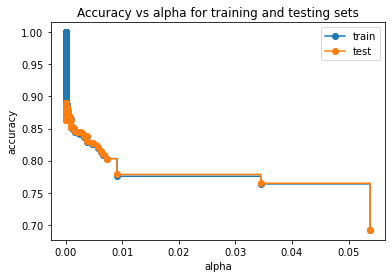

In [32]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts] 

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label ="train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label ="test", drawstyle = "steps-post")
ax.legend()
plt.show

<AxesSubplot:xlabel='tree'>

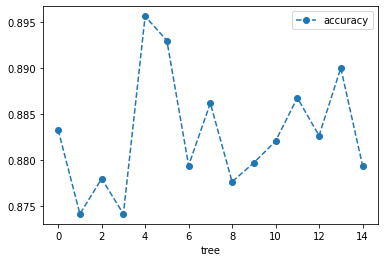

In [33]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.0001)
scores = cross_val_score(clf_dt, X_train, y_train, cv = 15)
df = pd.DataFrame(data= {'tree':range(15), 'accuracy':scores})
df.plot(x='tree', y='accuracy', marker = 'o', linestyle = '--')

In [34]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha=0.0001)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

C:\Users\lpennella\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


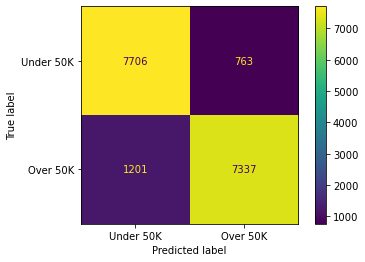

In [35]:
plot_confusion_matrix(clf_dt_pruned,
                      X_test,
                      y_test,
                      display_labels=["Under 50K", "Over 50K"])

In [36]:
print(f'train accuracy: {accuracy_score(y_train,clf_dt_pruned.predict(X_train))}')
print(f'test accuracy:  {accuracy_score(y_test,clf_dt_pruned.predict(X_test))}')
print(classification_report(y_test,clf_dt_pruned.predict(X_test)))

train accuracy: 0.8924560475098489
test accuracy:  0.8845181395895808
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      8469
           1       0.91      0.86      0.88      8538

    accuracy                           0.88     17007
   macro avg       0.89      0.88      0.88     17007
weighted avg       0.89      0.88      0.88     17007



In [37]:
importance = clf_dt_pruned.feature_importances_

In [38]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03702
Feature: 1, Score: 0.00258
Feature: 2, Score: 0.12565
Feature: 3, Score: 0.07364
Feature: 4, Score: 0.01333
Feature: 5, Score: 0.04107
Feature: 6, Score: 0.00104
Feature: 7, Score: 0.00423
Feature: 8, Score: 0.01277
Feature: 9, Score: 0.00328
Feature: 10, Score: 0.01916
Feature: 11, Score: 0.00139
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.15466
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00030
Feature: 16, Score: 0.00203
Feature: 17, Score: 0.31428
Feature: 18, Score: 0.02114
Feature: 19, Score: 0.01749
Feature: 20, Score: 0.01138
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.01791
Feature: 23, Score: 0.00728
Feature: 24, Score: 0.00984
Feature: 25, Score: 0.00997
Feature: 26, Score: 0.01175
Feature: 27, Score: 0.01341
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00556
Feature: 30, Score: 0.00699
Feature: 31, Score: 0.00909
Feature: 32, Score: 0.00514
Feature: 33, Score: 0.00940
Feature: 34, Score: 0.00190
Feature: 35, Score: 0.00000
Fe

In [48]:
top_F = pd.Series(clf_dt_pruned.feature_importances_, index=X_train.columns)
top_F = top_F.sort_values(ascending=False)
top_F.head(15)

marital-status_Never-married    0.314278
marital-status_Divorced         0.154663
educational-num                 0.125650
capital-gain                    0.073642
hours-per-week                  0.041065
age                             0.037019
marital-status_Separated        0.021144
workclass_Self-emp-not-inc      0.019156
occupation_Craft-repair         0.017905
gender_Male                     0.017760
marital-status_Widowed          0.017495
gender_Female                   0.013472
occupation_Other-service        0.013408
capital-loss                    0.013330
workclass_Private               0.012771
dtype: float64

In [50]:
bottom_f = pd.Series(clf_dt_pruned.feature_importances_, index=X_train.columns)
bottom_f = bottom_f.sort_values(ascending=True)
bottom_f.head(60)

race_Other                                   0.000000
native-country_Hong                          0.000000
native-country_Honduras                      0.000000
native-country_Holand-Netherlands            0.000000
native-country_Haiti                         0.000000
native-country_Guatemala                     0.000000
native-country_Greece                        0.000000
native-country_Germany                       0.000000
native-country_France                        0.000000
native-country_England                       0.000000
native-country_El-Salvador                   0.000000
native-country_Ecuador                       0.000000
native-country_Dominican-Republic            0.000000
native-country_Cuba                          0.000000
native-country_Columbia                      0.000000
native-country_China                         0.000000
native-country_Canada                        0.000000
native-country_Cambodia                      0.000000
native-country_Hungary      

In [51]:
X_encoded_clean = pd.get_dummies(X, columns= ['workclass',
                                        'marital-status',
                                        'occupation',
                                        'relationship',
                                        'gender']) 
X_encoded_clean.head()

,age,fnlwgt,education,educational-num,race,capital-gain,capital-loss,hours-per-week,native-country,workclass_Federal-gov,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Female,gender_Male
0,25,226802,11th,7,Black,0,0,40,United-States,0,...,0,0,0,0,0,1,0,0,0,1
1,38,89814,HS-grad,9,White,0,0,50,United-States,0,...,0,0,1,0,0,0,0,0,0,1
2,28,336951,Assoc-acdm,12,White,0,0,40,United-States,0,...,0,0,1,0,0,0,0,0,0,1
3,44,160323,Some-college,10,Black,7688,0,40,United-States,0,...,0,0,1,0,0,0,0,0,0,1
5,34,198693,10th,6,White,0,0,30,United-States,0,...,0,0,0,1,0,0,0,0,0,1


In [52]:
X_encoded_clean = X_encoded_clean.drop(['education','race','native-country'], axis = 1).copy()
X_encoded_clean.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Female,gender_Male
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [53]:
smote_n = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_encoded_clean,y_final)
print(y_balanced.value_counts())

>50K
0       34014
1       34014
dtype: int64


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, random_state = 42)

C:\Users\lpennella\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


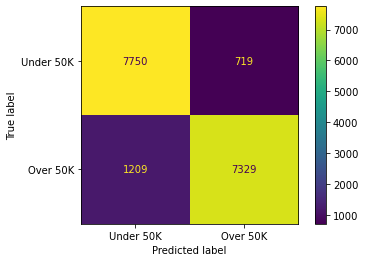

In [55]:
clf_dt_pruned_clean = DecisionTreeClassifier(random_state = 42, ccp_alpha=0.0001)
clf_dt_pruned_clean = clf_dt_pruned.fit(X_train, y_train)
plot_confusion_matrix(clf_dt_pruned_clean,
                      X_test,
                      y_test,
                      display_labels=["Under 50K", "Over 50K"])

In [56]:
print(f'train accuracy: {accuracy_score(y_train,clf_dt_pruned.predict(X_train))}')
print(f'test accuracy:  {accuracy_score(y_test,clf_dt_pruned.predict(X_test))}')
print(classification_report(y_test,clf_dt_pruned.predict(X_test)))

train accuracy: 0.893044040689128
test accuracy:  0.8866349150349856
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      8469
           1       0.91      0.86      0.88      8538

    accuracy                           0.89     17007
   macro avg       0.89      0.89      0.89     17007
weighted avg       0.89      0.89      0.89     17007

